In [ ]:
#Importando as bibliotecas: 
import pandas as pd
import nltk
import string  
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import drive
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Montando drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Bases de dados geradas em .csv ap칩s cada pr칠-processamento. Elas est칚o dispon칤veis no github do grupo.
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BASE-ATUAL.xlsx')
df_tratamentoInicial = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resultado.csv')
df_tokeniza칞칚oStopWords = pd.read_csv('/content/drive/MyDrive/df_tokeniza칞칚oStopWords.csv')
df_bagOfWords = pd.read_csv('/content/drive/MyDrive/df_bagOfWords.csv')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


An치lise da porcentagem dos coment치rios do BTG Pactual em rela칞칚o aos outros coment치rios dos usu치rios no Instagram. 

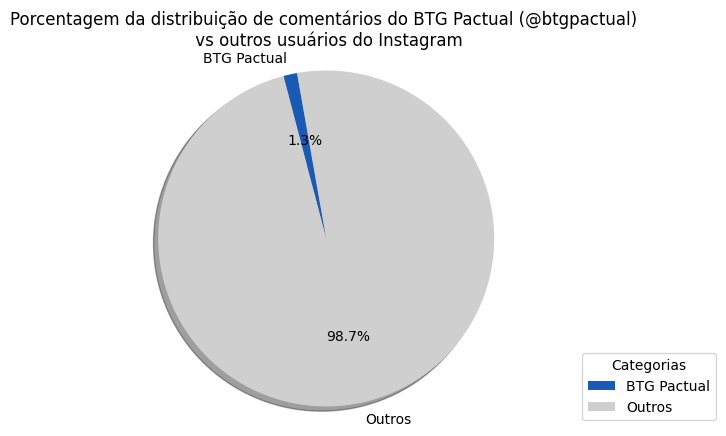

In [129]:
# Contagem de coment치rios feitos pelo BTG Pactual
num_comments_btg = len(df[df['"autor"'] == 'btgpactual'])

# Contagem de coment치rios feitos por outros usu치rios
num_comments_others = len(df[df['"autor"'] != 'btgpactual'])

# C치lculo das porcentagens
total_comments = num_comments_btg + num_comments_others
btg_percentage = (num_comments_btg / total_comments) * 100
others_percentage = (num_comments_others / total_comments) * 100


# Definindo as cores
colors = ['#195AB4', '#CFCFCF']

# Cria칞칚o do gr치fico de pizza
labels = ['BTG Pactual', 'Outros']
sizes = [btg_percentage, others_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, colors=colors)
ax1.axis('equal')
ax1.set_title('Porcentagem da distribui칞칚o de coment치rios do BTG Pactual (@btgpactual) \n vs outros usu치rios do Instagram')
ax1.legend(title='Categorias', loc='center right', bbox_to_anchor=(1.3, 0.1))
plt.show()


An치lise da quantidade de palavras ap칩s cada etapa do pr칠-processamento:

In [130]:
# Base original fornecida pelo BTG Pactual (df)
df['Num Words'] = df['"texto"'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' da base original: ", df['"texto"'].str.split().str.len().sum())

# Base ap칩s remo칞칚o dos coment치rios do BTG Pactual (df_tratamentoInicial)
df_tratamentoInicial['Num Words'] = df_tratamentoInicial['texto'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' - dfClean: ", df_tratamentoInicial['texto'].str.split().str.len().sum())

# Base ap칩s tokeniza칞칚o e remo칞칚o de stopwords (df_tokeniza칞칚oStopWords)
df_tokeniza칞칚oStopWords['Num Words'] = df_tokeniza칞칚oStopWords['Frases_sem_stop_words'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'texto' - df_semstopwords: ", df_tokeniza칞칚oStopWords['Frases_sem_stop_words'].str.split().str.len().sum())

# Base ap칩s bag of words (df_bagOfWords)
df_bagOfWords['Num Words'] = df_bagOfWords['Palavra'].apply(lambda x: len(nltk.word_tokenize(x)))
print("Quantidade de palavras na coluna 'Palavra' - df_final: ", df_bagOfWords['Palavra'].str.split().str.len().sum())


Quantidade de palavras na coluna 'texto' da base original:  522820
Quantidade de palavras na coluna 'texto' - dfClean:  96218
Quantidade de palavras na coluna 'texto' - df_semstopwords:  42283
Quantidade de palavras na coluna 'Palavra' - df_final:  7597


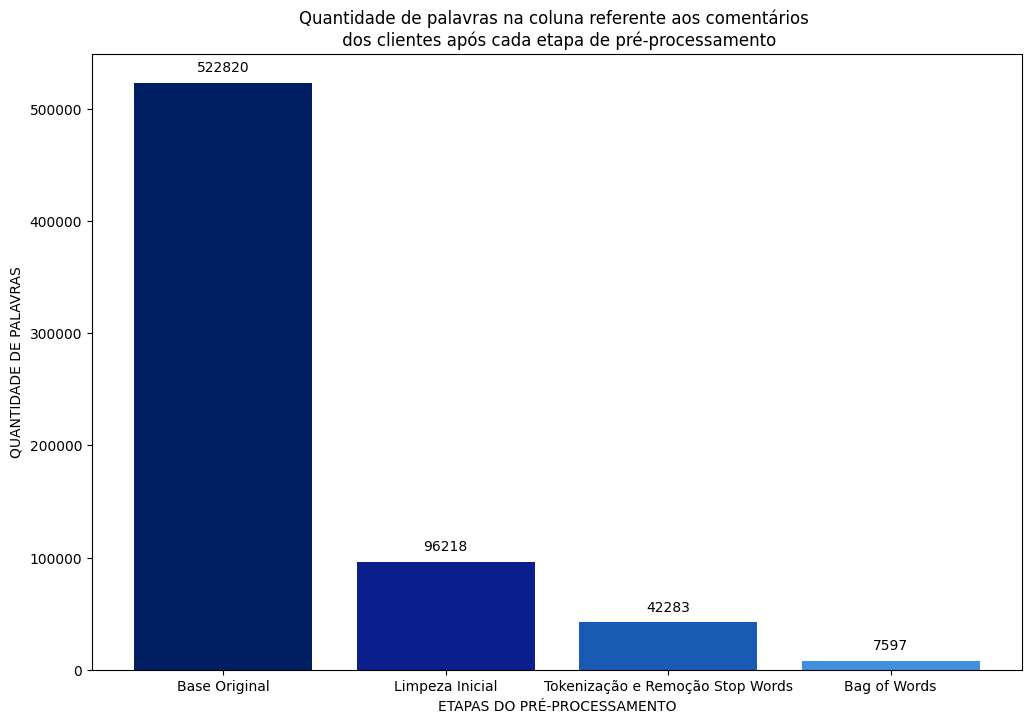

In [131]:
# Gr치fico dos resultados das palavras ap칩s cada etapa do pr칠-processamento.

# Definindo a quantidade de palavras em cada base
word_count = [df['"texto"'].str.split().apply(len).sum(),
              df_tratamentoInicial['texto'].str.split().apply(len).sum(),
              df_tokeniza칞칚oStopWords['Frases_sem_stop_words'].str.split().apply(len).sum(),
              df_bagOfWords['Palavra'].str.split().apply(len).sum()]

# Definindo os r칩tulos para cada pr칠-processamento
labels = ['Base Original', 'Limpeza Inicial', 'Tokeniza칞칚o e Remo칞칚o Stop Words', 'Bag of Words']

# Criando um gr치fico de barras
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(labels, word_count)

# Adicionando r칩tulos aos eixos e t칤tulo ao gr치fico
ax.set_xlabel('ETAPAS DO PR칄-PROCESSAMENTO')
ax.set_ylabel('QUANTIDADE DE PALAVRAS')
ax.set_title('Quantidade de palavras na coluna referente aos coment치rios \n dos clientes ap칩s cada etapa de pr칠-processamento')

# Adicionando os n칰meros de palavras acima de cada barra
for i, v in enumerate(word_count):
    ax.text(i, v + 10000, str(v), ha='center')

colors = ['#001E62', '#0A1E8C', '#195AB4', '#418FDE']
ax.bar(labels, word_count, color=colors)

# Mostrando o gr치fico
plt.show()


An치lise do n칰mero de linhas e colunas da primeira e da 칰ltima base.

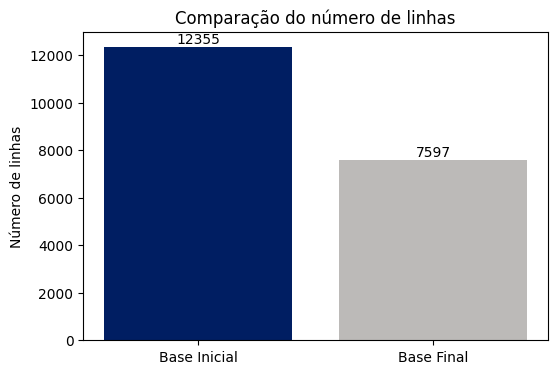

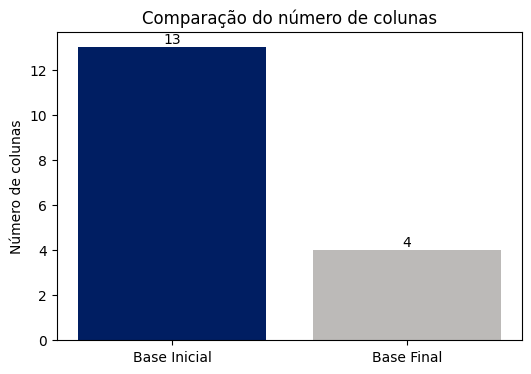

In [132]:
# quantidade de linhas e colunas em df
num_rows_df = df.shape[0]
num_columns_df = df.shape[1]

# quantidade de linhas e colunas em df_bagOfWords
num_rows_df_final = df_bagOfWords.shape[0]
num_columns_df_final = df_bagOfWords.shape[1]

# Gr치fico de barras para as linhas
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # define o tamanho da figura
rects1 = ax.bar(['Base Inicial', 'Base Final'], [num_rows_df, num_rows_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Compara칞칚o do n칰mero de linhas')
ax.set_ylabel('N칰mero de linhas')

# Adiciona o n칰mero respectivo em cima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.1),  # desloca o texto 0.1 pontos acima
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

# Gr치fico de barras para as colunas
fig, ax = plt.subplots()
fig.set_size_inches(6, 4) # define o tamanho da figura
rects2 = ax.bar(['Base Inicial', 'Base Final'], [num_columns_df, num_columns_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Compara칞칚o do n칰mero de colunas')
ax.set_ylabel('N칰mero de colunas')

# Adiciona o n칰mero respectivo em cima de cada barra
autolabel(rects2)
plt.show()


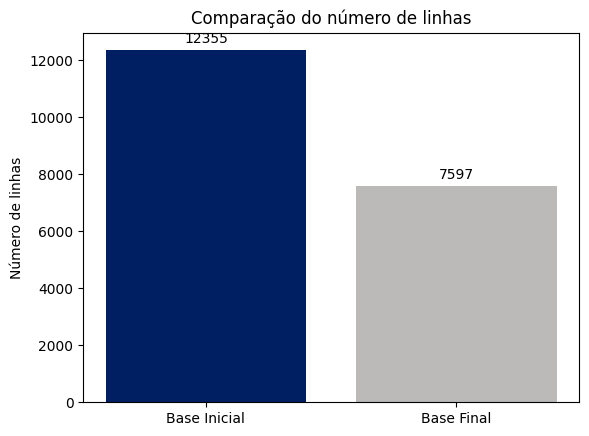

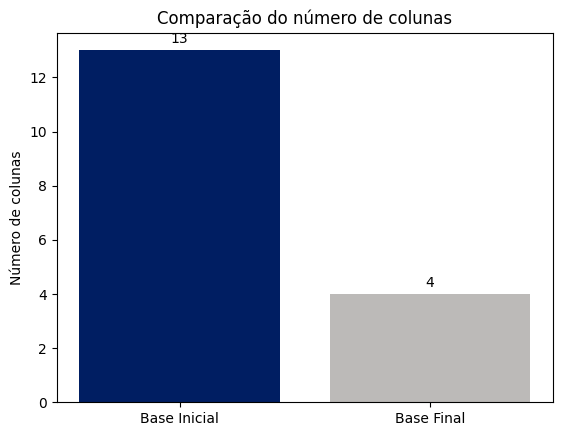

In [133]:
import matplotlib.pyplot as plt

# quantidade de linhas e colunas em df
num_rows_df = df.shape[0]
num_columns_df = df.shape[1]

# quantidade de linhas e colunas em df_bagOfWords
num_rows_df_final = df_bagOfWords.shape[0]
num_columns_df_final = df_bagOfWords.shape[1]

# Gr치fico de barras para as linhas
fig, ax = plt.subplots()
rects1 = ax.bar(['Base Inicial', 'Base Final'], [num_rows_df, num_rows_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Compara칞칚o do n칰mero de linhas')
ax.set_ylabel('N칰mero de linhas')

# Adiciona o n칰mero respectivo em cima de cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # desloca o texto 3 pontos acima
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

# Gr치fico de barras para as colunas
fig, ax = plt.subplots()
rects2 = ax.bar(['Base Inicial', 'Base Final'], [num_columns_df, num_columns_df_final], color=['#001E62', '#bcbab8'])
ax.set_title('Compara칞칚o do n칰mero de colunas')
ax.set_ylabel('N칰mero de colunas')

# Adiciona o n칰mero respectivo em cima de cada barra
autolabel(rects2)
plt.show()


Hip칩teses do grupo de colunas que afetem e n칚o afetam a an치lise dos sentimentos dos cliente. 

## Colunas que n칚o afetam na an치lise de sentimento:

Segundo nossas hip칩teses, as colunas que podem n칚o estar relacionadas a verifica칞칚o do sentimento dos clientes do BTG Pactual atrav칠s dos coment치rios s칚o:

- id: esta informa칞칚o n칚o tem rela칞칚o direta com o sentimento do cliente e n칚o ajudar치 a entender sua opini칚o sobre seus produtos ou servi칞os.
- Autor: informa칞칚o n칚o diretamente relacionada ao sentimento do cliente, a menos que haja uma hip칩tese espec칤fica sobre isso.
- Tipo de Intera칞칚o: informa칞칚o n칚o diretamente relacionada ao sentimento do cliente e n칚o ajudar치 a entender sua opini칚o sobre seus produtos ou servi칞os.
- Link do post: informa칞칚o n칚o diretamente relacionada ao sentimento do cliente e n칚o ajudar치 a entender sua opini칚o sobre seus produtos ou servi칞os.
- Processado: Esta coluna pode ser relevante dependendo do seu objetivo de an치lise. Se a coluna indicar se um coment치rio foi processado por um software de an치lise de sentimento, por exemplo, ela pode ser 칰til para entender a precis칚o dos resultados da an치lise.
- Cont칠m Hyperlink: informa칞칚o n칚o diretamente relacionada ao sentimento do cliente e n칚o ajudar치 a entender sua opini칚o sobre seus produtos ou servi칞os.
- Probabilidade de anomalia: Esta coluna pode ser relevante dependendo do seu objetivo de an치lise. Se a coluna indicar a probabilidade de um coment치rio ser uma anomalia, ela pode ser 칰til para entender a qualidade geral dos dados.

## Colunas que tem rela칞칚o direta com o resultado da an치lise de sentimento dos clientes:

J치 as colunas que podem ter rela칞칚o direta com 

- Texto: Esta 칠 a coluna mais importante, pois cont칠m o feedback direto dos clientes sobre seus produtos ou servi칞os.
- Data da Publica칞칚o: A data pode ser 칰til para detectar tend칡ncias temporais e mudan칞as na percep칞칚o do cliente ao longo do tempo.
- Sentimento: Esta coluna 칠 importante, pois 칠 onde est치 registrado o sentimento do cliente em rela칞칚o ao produto ou servi칞o.

Gr치fico das colunas relevantes e irrelevantes segundo hip칩teses feitas pelo grupo. 

<ipython-input-135-45758667c69c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns, rotation=90)


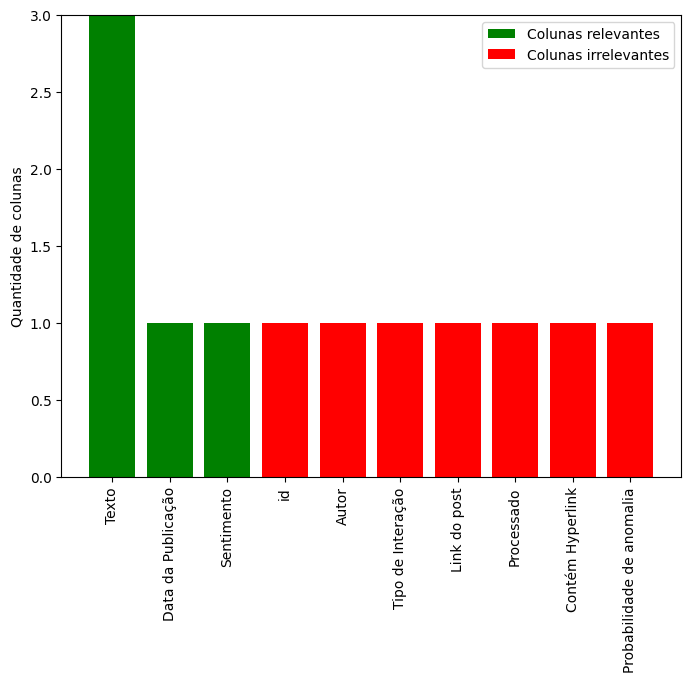

In [135]:
# Definir os dados do gr치fico
columns = ['Texto', 'Data da Publica칞칚o', 'Sentimento', 'id', 'Autor', 'Tipo de Intera칞칚o', 'Link do post', 'Processado', 'Cont칠m Hyperlink', 'Probabilidade de anomalia']
relevant_quantity = [3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
irrelevant_quantity = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# Plotar o gr치fico
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(columns, relevant_quantity, color='green', label='Colunas relevantes')
ax.bar(columns, irrelevant_quantity, bottom=relevant_quantity, color='red', label='Colunas irrelevantes')
ax.set_xticklabels(columns, rotation=90)
ax.set_ylabel('Quantidade de colunas')
ax.legend()

plt.show()


In [137]:
# Contagem de sentimentos
fellings = df_tokeniza칞칚oStopWords['sentimento'].value_counts()
print(fellings)

# Contagem de palavras na primeira base "df"
words_df = df['"texto"'].str.split().apply(len).sum()
print("N칰mero total de palavras nos coment치rios da base inicial:", words_df)

# Contagem de palavras na 칰ltima base
words_df_tokeniza칞칚oStopWords = df_tokeniza칞칚oStopWords['texto'].str.split().apply(len).sum()
print("N칰mero total de palavras nos coment치rios da base ap칩s tratamento:", df_tokeniza칞칚oStopWords)


NEUTRAL     2798
NEGATIVE    1952
POSITIVE    1606
Name: sentimento, dtype: int64
N칰mero total de palavras nos coment치rios da base inicial: 522820
N칰mero total de palavras nos coment치rios da base ap칩s tratamento:               dataPublicada                     autor  \
0     "2022-03-04 08:36:00"                lmviapiana   
1     "2022-03-03 21:10:00"              vanilson_dos   
2     "2022-03-03 20:54:00"               ricktolledo   
3     "2022-03-03 18:56:00"          claudiofalavinha   
4     "2022-03-03 16:11:00"     paularodrigues.invest   
...                     ...                       ...   
6351  "2022-11-30 07:48:00"  perspectiveinvestimentos   
6352  "2022-11-30 08:42:00"              marlenenelso   
6353  "2022-11-30 11:27:00"            eduardocolares   
6354  "2022-11-30 12:18:00"             jayipacderota   
6355  "2022-11-30 14:27:00"                 bfmarilia   

                                                  texto sentimento  \
0                               

Porcentagem dos sentimentos dos cliente (na porcentagem de neutros h치 a considera칞칚o de emojis, o que torna o n칰mero impreciso).

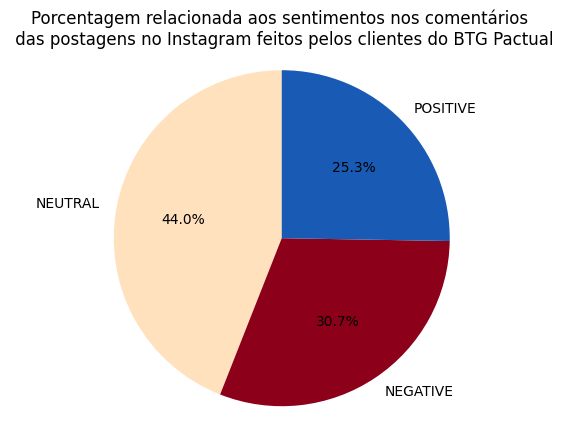

In [138]:
# Lista de cores
colors = ['#FFE1BE', '#8C0019', '#195AB4']

# Contagem de sentimentos
fellings = df_tokeniza칞칚oStopWords['sentimento'].value_counts()

# Cria um gr치fico de pizza com as contagens de sentimentos
fig, ax = plt.subplots()
ax.pie(fellings.values, labels=fellings.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.title('Porcentagem relacionada aos sentimentos nos coment치rios \n das postagens no Instagram feitos pelos clientes do BTG Pactual')

# Mostra o gr치fico
plt.show()


Fun칞칚o "describe" da base de dados inicial. 

In [ ]:
df.describe()

id    "anomalia"  "probabilidadeAnomalia"  "processado"  \
count  1.235500e+04  12355.000000             12355.000000       12355.0   
mean   1.757789e+06      0.222339                37.325698           0.0   
std    7.967971e+05      0.415835                16.374936           0.0   
min    1.000000e+00      0.000000                 7.000000           0.0   
25%    1.314377e+06      0.000000                24.000000           0.0   
50%    1.783879e+06      0.000000                37.000000           0.0   
75%    2.388714e+06      0.000000                48.000000           0.0   
max    3.045012e+06      1.000000               100.000000           0.0   

       "contemHyperlink"  Num Palavras  
count       12355.000000  12355.000000  
mean            0.005423     50.273007  
std             0.073443     62.843977  
min             0.000000      1.000000  
25%             0.000000      7.000000  
50%             0.000000     25.000000  
75%             0.000000     71.000000  
max             1.000000    336.000000

20 palavras mais ditas nos coment치rios:

In [ ]:
# Ordena as palavras em ordem decrescente pela frequ칡ncia e seleciona as 20 primeiras
top_words = df_bagOfWords.sort_values(by='Frequ칡ncia', ascending=False)['Palavra'].head(20).tolist()

# Imprime as 20 palavras mais frequentes
print('As 20 palavras mais frequentes s칚o: ', top_words)


As 20 palavras mais frequentes s칚o:  ['banco', 'btg', 'pra', 'limite', 'conta', 'cart칚o', 'melhor', 'agora', 'sempre', 'fazer', 'vai', 'dinheiro', 'ter', 'vcs', 'obrigado', 'flu', 'tudo', 'nunca', 'sobre', 'todos']
